In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #to separate between the train and the set data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import  SVC
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [4]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

### **Explore data (EDA) **

In [5]:
train.head()
#train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe() #on int or float types

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
nu=train.isnull().sum()
nu[nu>0] #create a dataframe of features contain a null or more

,0
Age,177
Cabin,687
Embarked,2


<Axes: >

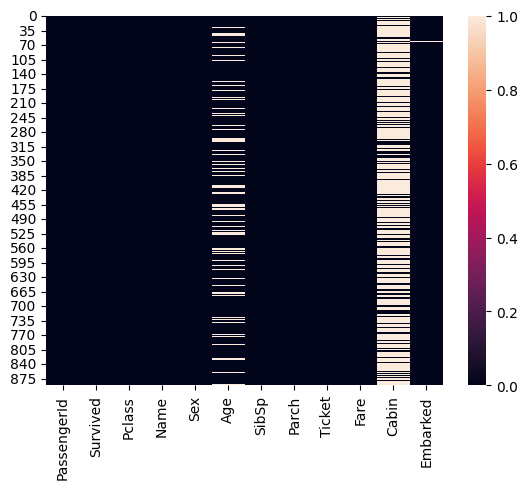

In [10]:
sns.heatmap(train.isnull())

# **Clean and Transform Data**

In [ ]:
#Delete the unwanted features
#Drop the NAN values or fill them with a value
#Transform the object data type

In [11]:
def clean(d):
    d.drop(['Name','Fare','Ticket','Embarked','Cabin'],axis=1,inplace=True) #axis =1 means delete it as columns
    d.Age= d.Age.fillna(d.Age.median()) #fill the NAN in Age column with the median of the ages
    d.dropna()

In [12]:
clean(train)
clean(test)

In [13]:

def transform(df1):
  non_obj=df1.select_dtypes(include='number')     #select numeric columns
  obj=df1.select_dtypes(exclude='number') #select non-numeric columns
#applies label encoding to non-numeric (categorical) columns
  for i in range(0,df1.shape[1]):             #df1.shape[1] represents the number of columns in the dataframe df1
   if df1.iloc[:,i].dtype=='object':          #iloc[] stands for integer location, it selects all rows of i-th column
     df1.iloc[:,i]=lab.fit_transform(df1.iloc[:,i])

transform(train)
transform(test)


In [14]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,28.0,1,2
889,890,1,1,1,26.0,0,0


In [15]:
test


,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0
414,1306,1,0,39.0,0,0
415,1307,3,1,38.5,0,0
416,1308,3,1,27.0,0,0


# **Data Analysis **

<Axes: >

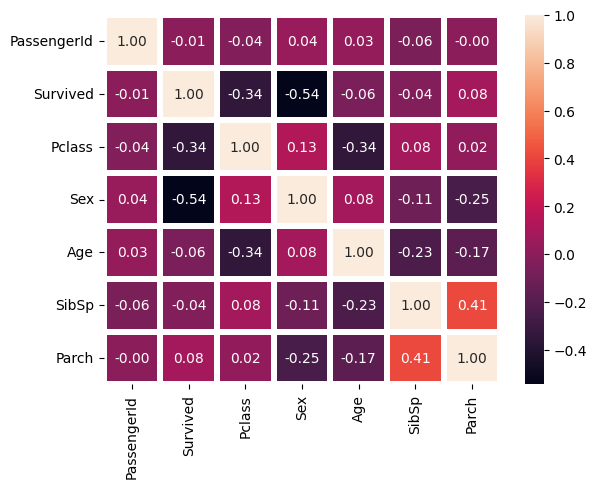

In [16]:
co=train.corr()
sns.heatmap(co,annot=True,fmt='.2f',linewidth=4)

In [17]:
SurvivedVUnsurvived=train.Survived.value_counts()

In [18]:
SurvivedVUnsurvived

,count
Survived,
0,549
1,342


<Axes: ylabel='count'>

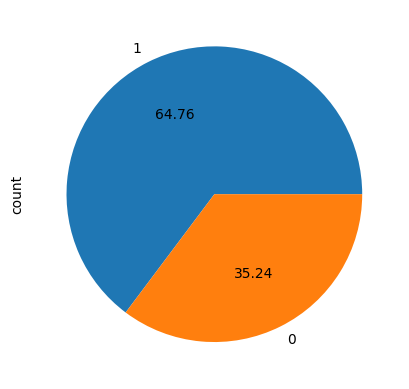

In [19]:
train.Sex.value_counts().plot.pie(autopct='%0.2f')


([<matplotlib.axis.XTick at 0x7f21e8729f00>,
 [Text(0, 0, 'female'), Text(1, 0, 'male')])

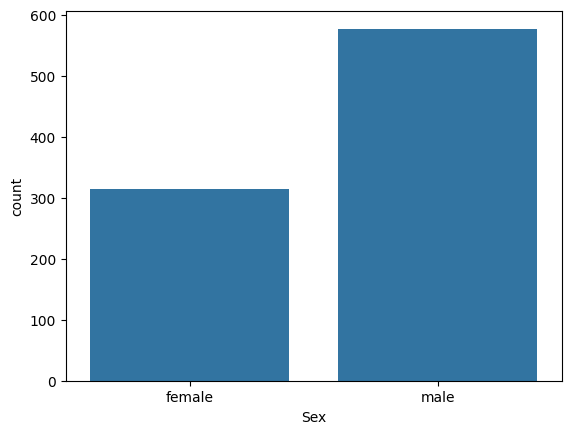

In [20]:
sns.countplot(x='Sex', data=train) # fixing the issue of overlays or formatting
plt.xticks([0, 1], ['female', 'male'])  # Manually set labels for 0 and 1 to female and male


([<matplotlib.axis.XTick at 0x7f21e85b8cd0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

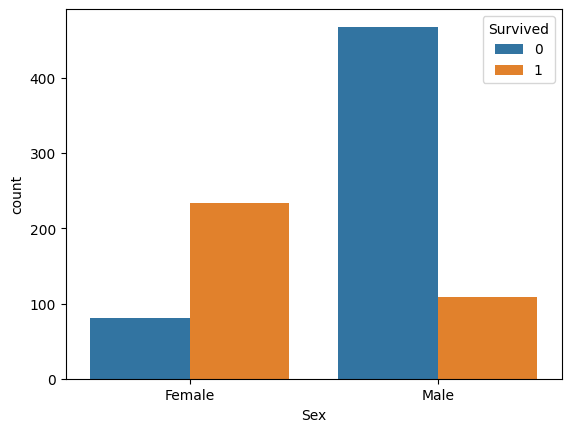

In [21]:
sns.countplot(x='Sex', hue='Survived',data=train)
plt.xticks([0,1],['Female','Male'])

<Axes: xlabel='Pclass', ylabel='count'>

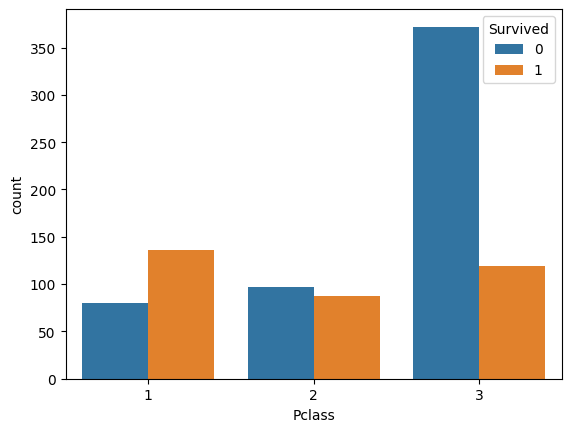

In [22]:

sns.countplot(x='Pclass',hue='Survived',data=train)

<Axes: xlabel='Age', ylabel='Count'>

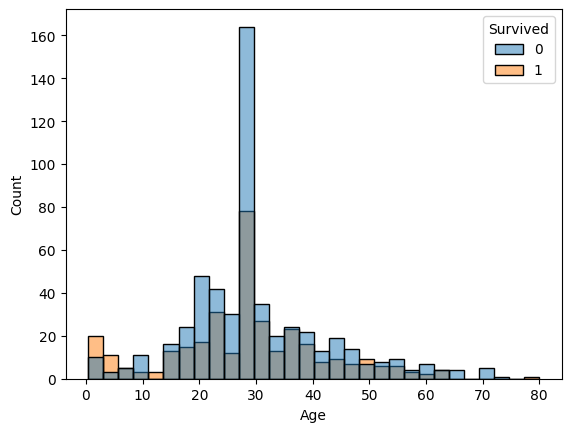

In [23]:
sns.histplot(x='Age',hue='Survived', data=train)

# **Model**

In [24]:
x=train.drop(['Survived'],axis=1) #all the train dataframe except the survived column
y=train.Survived

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [26]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
pre=model1.predict(x_test)

In [28]:
accuracy_score(pre , y_test)

0.7653631284916201

In [29]:
accuracies=[]

In [30]:
def all(model):
  model.fit(x_train,y_train) #fit data
  pre=model.predict(x_test)   #predict data
  accuracy=accuracy_score(pre, y_test)
  print('Accuracy',accuracy)
  accuracies.append(accuracy)


In [31]:
model2=LogisticRegression()
all(model2)

Accuracy 0.8324022346368715


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
model3=RandomForestClassifier()
all(model3)

Accuracy 0.8100558659217877


In [33]:
model4=GradientBoostingClassifier()
all(model4)

Accuracy 0.8100558659217877


In [34]:
model5=DecisionTreeClassifier()
all(model5)

Accuracy 0.7877094972067039


In [35]:
model6=GaussianNB()
all(model6)

Accuracy 0.7821229050279329


In [36]:
model7=KNeighborsClassifier()
all(model7)

Accuracy 0.5363128491620112


In [37]:
model8=SVC()
all(model8)

Accuracy 0.5642458100558659


In [38]:
Algorithms=['KNeighborsClassifier','RandomForest','GradientBoostClassialgorithmsfier','DescisionTreeClassifier','KNeighborsClassifier','SVC','GaussianNB']

In [41]:
new=pd.DataFrame({"Algorithms":Algorithms, "accuracies":accuracies})

In [42]:
new

,Algorithms,accuracies
0,KNeighborsClassifier,0.832402
1,RandomForest,0.810056
2,GradientBoostClassialgorithmsfier,0.810056
3,DescisionTreeClassifier,0.787709
4,KNeighborsClassifier,0.782123
5,SVC,0.536313
6,GaussianNB,0.564246


In [43]:
modelx=KNeighborsClassifier()
modelx.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
pre2=modelx.predict(test)

In [47]:
final=test.PassengerId

In [55]:
new2=pd.DataFrame({'passengerId':final, 'Survived':pre2})


In [56]:
new2

,passengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [58]:
new2.to_csv('submission.csv',index=False)